In [12]:
from fastai.tabular.all import *
import torch
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Ti Laptop GPU'

In [13]:
train_df_x  = pd.read_csv('data/only2.csv')
train_df_y = pd.read_csv('data/only2_y.csv')

In [14]:
list_x = train_df_x.columns.tolist()
list_x[0] = 'cell_line'
train_df_x.columns = list_x

In [15]:
train_df_x.set_index('cell_line', inplace=True)
train_df_x.head()

NCIH1568-2    SCC9-2  HCC1428-2    U2OS-2    LU99-2   CALU3-2  \
cell_line                                                                  
7105.0       5.626439  3.964399   4.002703  5.098453  3.665620  5.774260   
8813.0       6.855242  5.718088   5.870365  6.543496  6.716717  6.361066   
57147.0      2.185867  2.260026   3.621759  2.117695  2.100978  2.718088   
55732.0      4.079805  3.451541   3.861955  4.115200  4.176323  3.762349   
2268.0       0.084064  0.084064   0.014355  0.014355  0.000000  0.028569   

           SNU449-2  NCIH1623-2  SW1116-2  NCIH2291-2  ...   EFO21-2  \
cell_line                                              ...             
7105.0     5.885818    3.286881  4.536675    5.512543  ...  5.982765   
8813.0     6.555816    5.716991  5.761817    5.722739  ...  7.405141   
57147.0    2.104337    2.761285  1.367371    1.879706  ...  2.531069   
55732.0    4.011675    3.786596  2.632268    3.578939  ...  3.139142   
2268.0     0.028569    0.070389  0.124328    0.014355  ...  0.028569   

             TE14-2  NCIH322-2   SF295-2   SW579-2  COV644-2  NCIH1373-2  \
cell_line                                                                  
7105.0     5.094236   4.932156  4.203201  4.288359  4.778209    4.022368   
8813.0     6.785551   6.523562  6.549361  6.548745  5.956986    5.235344   
57147.0    3.250962   2.735522  2.077243  1.906891  2.046142    2.653060   
55732.0    4.278728   4.414812  4.117695  3.629939  3.880686    3.682573   
2268.0     0.028569   0.070389  0.028569  0.070389  0.201634    0.028569   

             A172-2  PATU8902-2    JHH6-2  
cell_line                                  
7105.0     0.189034    5.287989  3.866908  
8813.0     6.642268    6.785943  6.245838  
57147.0    2.330558    1.687061  2.217231  
55732.0    4.726831    3.648465  3.517276  
2268.0     0.028569    0.014355  0.042644  

[5 rows x 472 columns]

In [16]:
list_y = train_df_y.columns.tolist()
list_y[0] = ''
train_df_y.columns = list_y

In [17]:
train_df_y.set_index('', inplace=True)
train_df_y.head()

NCIH1568-2    SCC9-2  HCC1428-2    U2OS-2    LU99-2   CALU3-2  SNU449-2  \
                                                                              
SF     0.60794  0.573035   0.450188  0.526517  0.625161  0.288041  0.680876   

    NCIH1623-2  SW1116-2  NCIH2291-2  ...   EFO21-2    TE14-2  NCIH322-2  \
                                      ...                                  
SF    0.617709  0.773369    0.656893  ...  0.724293  0.653585   0.912587   

     SF295-2   SW579-2  COV644-2  NCIH1373-2  A172-2  PATU8902-2    JHH6-2  
                                                                            
SF  0.458665  0.746196  0.764134    0.623395  0.5204    0.858459  0.581603  

[1 rows x 472 columns]

In [18]:
train_y_transposed = train_df_y.transpose()
train_y_transposed.head()

SF
NCIH1568-2  0.607940
SCC9-2      0.573035
HCC1428-2   0.450188
U2OS-2      0.526517
LU99-2      0.625161

In [19]:
train_x_transposed = train_df_x.transpose()
train_x_transposed.head()

cell_line   7105.0    8813.0    57147.0   55732.0   2268.0    3075.0    \
NCIH1568-2  5.626439  6.855242  2.185867  4.079805  0.084064  0.176323   
SCC9-2      3.964399  5.718088  2.260026  3.451541  0.084064  0.782409   
HCC1428-2   4.002703  5.870365  3.621759  3.861955  0.014355  0.485427   
U2OS-2      5.098453  6.543496  2.117695  4.115200  0.014355  0.432959   
LU99-2      3.665620  6.716717  2.100978  4.176323  0.000000  1.263034   

cell_line   2519.0    2729.0    4800.0    90529.0   ...  8359.0    8336.0    \
NCIH1568-2  6.824513  4.956521  3.766595  2.298658  ...  0.555816  0.622930   
SCC9-2      6.039796  5.778734  4.903038  2.711495  ...  0.000000  1.536053   
HCC1428-2   4.614121  5.286881  4.429616  3.442280  ...  0.464668  3.033863   
U2OS-2      5.684258  4.847997  5.108524  2.189034  ...  2.307429  0.176323   
LU99-2      6.124948  4.395063  5.070389  2.669027  ...  1.207893  1.321928   

cell_line   84311.0   126661.0  79447.0   283521.0  29122.0   9997.0    \
NCIH1568-2  5.373996  1.956057  5.482203  0.422233  0.176323  0.918386   
SCC9-2      5.042207  2.344828  3.937344  0.000000  0.042644  2.475085   
HCC1428-2   4.539159  1.970854  5.895303  0.622930  0.014355  0.918386   
U2OS-2      5.028569  2.967169  4.995937  0.111031  0.042644  2.010780   
LU99-2      6.613679  1.438293  4.349082  0.000000  0.111031  1.111031   

cell_line   388963.0  6905.0    
NCIH1568-2  1.778209  4.050502  
SCC9-2      1.176323  4.174726  
HCC1428-2   2.244887  5.555816  
U2OS-2      1.925999  4.635754  
LU99-2      1.632268  5.197315  

[5 rows x 15139 columns]

In [20]:
sf_list = train_y_transposed['SF'].tolist()
print(sf_list)

[0.607939586, 0.573034936, 0.450187541, 0.526517154, 0.62516102, 0.288041344, 0.680876225, 0.617709187, 0.773368828, 0.656893391, 0.684841851, 0.864685125, 0.625638466, 0.471094972, 0.514377604, 0.636503955, 0.487424971, 0.6445884, 0.293120491, 0.0652, 0.697243985, 0.657366049, 0.758304282, 0.705803231, 0.309656085, 0.654470794, 0.693458827, 0.523985386, 0.577927408, 0.765791783, 0.664208761, 0.163716934, 0.820865321, 0.622889732, 0.492937792, 0.762902244, 0.308686009, 0.624348944, 0.824810915, 0.381676649, 0.867291739, 0.133856517, 0.442439081, 0.492897041, 0.64302206, 0.748380533, 0.797011797, 0.550270209, 0.894529315, 0.849395534, 0.216938871, 0.356971744, 0.686707511, 0.894010607, 0.391514065, 0.710263861, 0.482677763, 0.66060661, 0.663339322, 0.392554631, 0.362271712, 0.851032207, 0.57526986, 0.274519283, 1.039376765, 0.579039601, 0.435398332, 0.45348309, 0.562613764, 0.802657129, 0.348698173, 1.152966439, 0.212502171, 0.646612081, 0.986785269, 0.434001563, 0.722236314, 0.78265399

In [21]:
train_x_transposed['SF'] = sf_list
train_x_transposed.head()

cell_line     7105.0    8813.0   57147.0   55732.0    2268.0    3075.0  \
NCIH1568-2  5.626439  6.855242  2.185867  4.079805  0.084064  0.176323   
SCC9-2      3.964399  5.718088  2.260026  3.451541  0.084064  0.782409   
HCC1428-2   4.002703  5.870365  3.621759  3.861955  0.014355  0.485427   
U2OS-2      5.098453  6.543496  2.117695  4.115200  0.014355  0.432959   
LU99-2      3.665620  6.716717  2.100978  4.176323  0.000000  1.263034   

cell_line     2519.0    2729.0    4800.0   90529.0  ...    8336.0   84311.0  \
NCIH1568-2  6.824513  4.956521  3.766595  2.298658  ...  0.622930  5.373996   
SCC9-2      6.039796  5.778734  4.903038  2.711495  ...  1.536053  5.042207   
HCC1428-2   4.614121  5.286881  4.429616  3.442280  ...  3.033863  4.539159   
U2OS-2      5.684258  4.847997  5.108524  2.189034  ...  0.176323  5.028569   
LU99-2      6.124948  4.395063  5.070389  2.669027  ...  1.321928  6.613679   

cell_line   126661.0   79447.0  283521.0   29122.0    9997.0  388963.0  \
NCIH1568-2  1.956057  5.482203  0.422233  0.176323  0.918386  1.778209   
SCC9-2      2.344828  3.937344  0.000000  0.042644  2.475085  1.176323   
HCC1428-2   1.970854  5.895303  0.622930  0.014355  0.918386  2.244887   
U2OS-2      2.967169  4.995937  0.111031  0.042644  2.010780  1.925999   
LU99-2      1.438293  4.349082  0.000000  0.111031  1.111031  1.632268   

cell_line     6905.0        SF  
NCIH1568-2  4.050502  0.607940  
SCC9-2      4.174726  0.573035  
HCC1428-2   5.555816  0.450188  
U2OS-2      4.635754  0.526517  
LU99-2      5.197315  0.625161  

[5 rows x 15140 columns]

In [114]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_x_transposed, test_size=0.2, random_state=25)

train_df.to_csv('data/train_df.csv')
test_df.to_csv('data/test_df.csv')

print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 377
No. of testing examples: 95


In [73]:
cont_names = train_df.columns.tolist()
cont_names.remove('SF')
dep_var = 'SF'
print(cont_names)
print(dep_var)

[7105.0, 8813.0, 57147.0, 55732.0, 2268.0, 3075.0, 2519.0, 2729.0, 4800.0, 90529.0, 57185.0, 81887.0, 22875.0, 6405.0, 1080.0, 54467.0, 889.0, 5893.0, 572.0, 51056.0, 4267.0, 9957.0, 26.0, 51384.0, 23072.0, 8379.0, 3927.0, 29916.0, 55365.0, 4074.0, 90293.0, 56603.0, 3382.0, 79007.0, 57679.0, 843.0, 8837.0, 7035.0, 55471.0, 10181.0, 9108.0, 6542.0, 381.0, 23098.0, 26073.0, 23129.0, 204.0, 952.0, 2288.0, 23028.0, 10180.0, 84254.0, 5965.0, 55610.0, 126393.0, 115703.0, 4706.0, 5166.0, 51364.0, 340273.0, 170302.0, 10165.0, 996.0, 799.0, 3052.0, 1856.0, 64063.0, 5976.0, 8935.0, 292.0, 55013.0, 3207.0, 5439.0, 56919.0, 4222.0, 221981.0, 3980.0, 79657.0, 6296.0, 81691.0, 57019.0, 56928.0, 80256.0, 51226.0, 5577.0, 10943.0, 1387.0, 9256.0, 4353.0, 5444.0, 6936.0, 84058.0, 54677.0, 5244.0, 55904.0, 57414.0, 30812.0, 25998.0, 7748.0, 23077.0, 26224.0, 3683.0, 5164.0, 3675.0, 7543.0, 3920.0, 3674.0, 51666.0, 51573.0, 55049.0, 9244.0, 114881.0, 26022.0, 51087.0, 9020.0, 6833.0, 54972.0, 163.0, 6376

In [74]:
SEED = 123
set_seed(SEED, reproducible=True)

In [76]:
y_names = ['SF']
cat_names = []
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(seed=SEED)(range_of(train_df))
bs = 64

In [77]:
db = TabularPandas(
    train_df,
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=y_names,
    y_block=RegressionBlock(),
    splits=splits,
)

In [78]:
dls = db.dataloaders(bs=bs)
dls.show_batch()

In [79]:
model_name = 'udi_net'

In [83]:
from fast_tabnet.core import *
model = TabNetModel(get_emb_sz(db), len(db.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)

In [84]:
# save the best model so far
cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=model_name+'_best')]

In [85]:
learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)

SuggestedLRs(valley=0.00363078061491251)

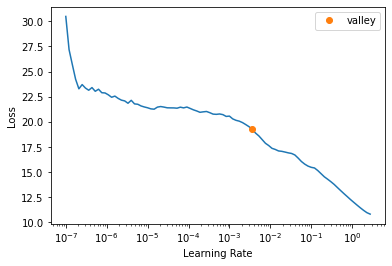

In [86]:
learn.lr_find()

In [105]:
learn.fit_one_cycle(500, 3e-2)

Better model found at epoch 0 with _rmse value: 0.21461495757102966.
Better model found at epoch 11 with _rmse value: 0.2123117744922638.
Better model found at epoch 12 with _rmse value: 0.2099376916885376.
Better model found at epoch 44 with _rmse value: 0.20640960335731506.
Better model found at epoch 45 with _rmse value: 0.2004537135362625.
Better model found at epoch 142 with _rmse value: 0.20001578330993652.


In [106]:
learn.show_results()

In [107]:
learn.load(model_name+'_best')

C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\fastai\learner.py:59: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [108]:
preds, targs = learn.get_preds()
preds = preds.squeeze(1)

In [109]:
rmse(preds, targs)

TensorBase(0.2000)

In [110]:
test_dl = dls.test_dl(test_df)

In [112]:
preds, labels = learn.get_preds(dl=test_dl)
preds = preds.squeeze(1)
print(preds)

tensor([0.5898, 0.7205, 0.8018, 0.6870, 0.7191, 0.6436, 0.7728, 0.6184, 0.7520,
        0.7369, 0.7083, 0.5874, 0.3812, 0.6066, 0.6324, 0.4504, 0.6638, 0.7182,
        0.7157, 0.5569, 0.5810, 0.5513, 0.4789, 0.4624, 0.6660, 0.5890, 0.5917,
        0.5206, 0.5761, 0.7705, 0.6460, 0.5129, 0.7334, 0.6484, 0.5418, 0.7304,
        0.6019, 0.5556, 0.6784, 0.6304, 0.5632, 0.5360, 0.5270, 0.6468, 0.5539,
        0.5743, 0.6034, 0.6125, 0.4805, 0.7422, 0.5936, 0.5168, 0.6841, 0.5707,
        0.5900, 0.6481, 0.5727, 0.6506, 0.6322, 0.4494, 0.4694, 0.8836, 0.6862,
        0.6746, 0.9144, 0.6110, 0.7054, 0.6282, 0.6627, 0.4249, 0.5272, 0.7753,
        0.6923, 0.6996, 0.5209, 0.5878, 0.8092, 0.6313, 0.5132, 0.8243, 0.5046,
        0.6136, 0.8587, 0.5758, 0.7675, 0.7284, 0.6165, 0.5731, 0.7006, 0.6346,
        0.6371, 0.7555, 0.8852, 0.5494, 0.6063])


In [113]:
rmse(preds, labels)
r2score(preds, labels)

TensorBase(0.1829)